In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the Titanic dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (891, 12)
Test shape: (418, 11)


In [4]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C
646,647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,S
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q


In [5]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
344,1236,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S
366,1258,3,"Caram, Mr. Joseph",male,NaN,1,0,2689,14.4583,NaN,C
61,953,2,"McCrae, Mr. Arthur Gordon",male,32.0,0,0,237216,13.5000,NaN,S
146,1038,1,"Hilliard, Mr. Herbert Henry",male,NaN,0,0,17463,51.8625,E46,S
79,971,3,"Doyle, Miss. Elizabeth",female,24.0,0,0,368702,7.7500,NaN,Q


In [6]:
# Data Preprocessing
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.info()
test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

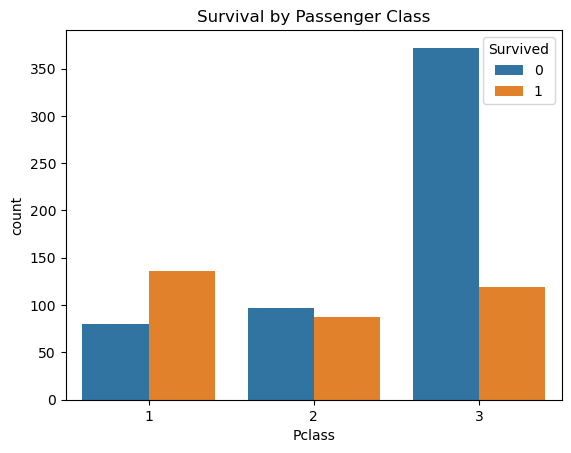

In [8]:
# Survival rate changes by passenger class
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title("Survival by Passenger Class")
plt.show()

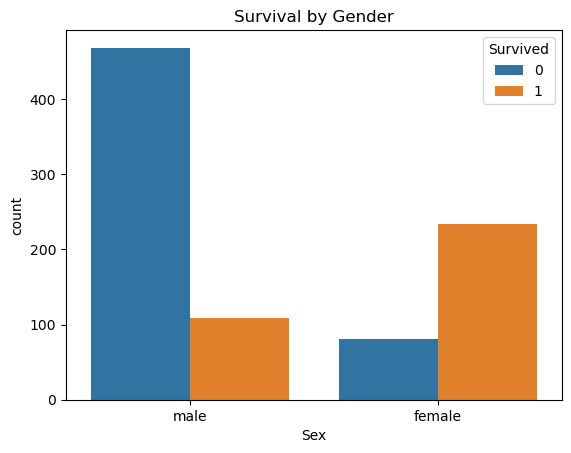

In [9]:
# Survival rate changes by gender
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title("Survival by Gender")
plt.show()

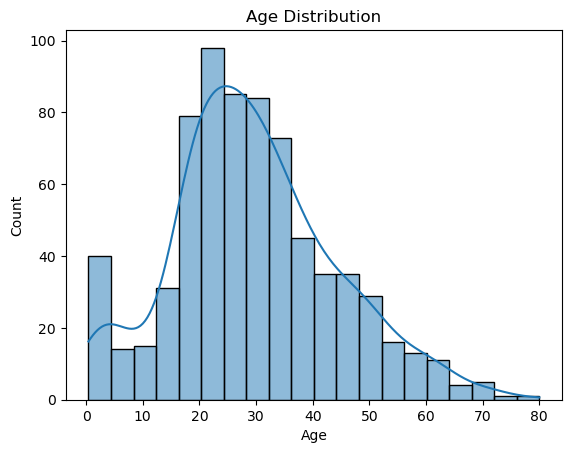

In [10]:
# Overall age distribution of passengers
sns.histplot(train['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

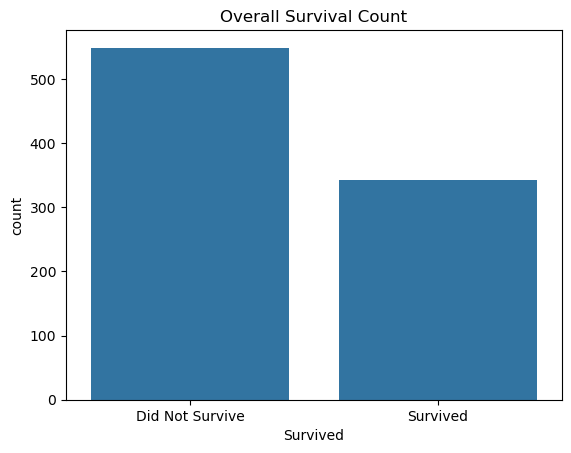

In [11]:
# See How many passengers survived vs not survived
sns.countplot(x='Survived', data=train)
plt.title("Overall Survival Count")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

In [12]:
# Drop 'Cabin'
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)


In [13]:
# Fill missing Age and Fare 
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)


In [14]:
# Fill missing Embarked and Fare values
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [15]:
# Create a new column 'FamilySize'
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [16]:
# Drop Previous
train = train.drop(['SibSp', 'Parch'], axis=1)
test = test.drop(['SibSp', 'Parch'], axis=1)

In [17]:
train.isnull().sum()
test.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
dtype: int64

In [18]:
# Create label encoders
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

train['Sex'] = le_sex.fit_transform(train['Sex'])
test['Sex'] = le_sex.transform(test['Sex'])

train['Embarked'] = le_embarked.fit_transform(train['Embarked'])
test['Embarked'] = le_embarked.transform(test['Embarked'])


In [19]:
# Split data into (X) and target (y)
X = train.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = train['Survived']


In [20]:
# Save PassengerId before dropping it for test Predictions
test_passenger_ids = test['PassengerId']

In [21]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Prepare test data by dropping same columns as in train.
X_test = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [23]:
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
# Check model performance
y_pred = model.predict(X_val)

# Accuracy
print("Accuracy:", accuracy_score(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report (optional but helpful)
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.8268156424581006

Confusion Matrix:
 [[90 15]
 [16 58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [25]:
# Predict on test data
test_predictions = model.predict(X_test)

In [26]:
# Create a DataFrame for submission
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_predictions
})
submission.to_csv("titanic_predictions.csv", index=False)
print("Predictions saved to titanic_predictions.csv successfully.")



Predictions saved to titanic_predictions.csv successfully.
